In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [4]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-06-03--16h-33m-47s',
 '2025-06-03--16h-35m-37s',
 '2025-06-03--16h-37m-20s',
 '2025-06-03--16h-39m-05s',
 '2025-06-03--16h-40m-50s',
 '2025-06-03--16h-42m-36s',
 '2025-06-03--16h-44m-21s',
 '2025-06-03--16h-46m-06s',
 '2025-06-03--16h-47m-52s',
 '2025-06-03--16h-49m-39s',
 '2025-06-03--16h-51m-26s',
 '2025-06-03--16h-53m-14s',
 '2025-06-03--16h-54m-59s',
 '2025-06-03--16h-56m-47s',
 '2025-06-03--16h-58m-36s',
 '2025-06-03--17h-00m-23s',
 '2025-06-03--17h-02m-09s',
 '2025-06-03--17h-03m-56s',
 '2025-06-03--17h-05m-43s',
 '2025-06-03--17h-07m-28s',
 '2025-06-03--17h-09m-15s',
 '2025-06-03--17h-11m-02s',
 '2025-06-03--17h-12m-49s',
 '2025-06-03--17h-14m-36s',
 '2025-06-03--17h-16m-22s',
 '2025-06-03--17h-18m-08s',
 '2025-06-03--17h-19m-55s',
 '2025-06-03--17h-21m-56s',
 '2025-06-03--17h-23m-44s',
 '2025-06-03--17h-25m-29s',
 '2025-06-03--17h-27m-14s',
 '2025-06-03--17h-29m-01s',
 '2025-06-03--17h-30m-48s',
 '2025-06-03--17h-32m-37s',
 '2025-06-03--17h-34m-23s',
 '2025-06-03--17h-36

In [5]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    # if repetitions is not in params, set it to 1
    if "repetitions" not in params.columns:
        params["repetitions"] = pd.Series([1])
    else:
        params["repetitions"] = params["repetitions"].astype(int)

    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi
0,2025-06-03--16h-33m-47s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000
1,2025-06-03--16h-33m-47s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000
2,2025-06-03--16h-33m-47s,2.0,38.0,0.0,0.0,40.0,NaN,0.317560,1.570796,0.000000,0.000000
3,2025-06-03--16h-33m-47s,2.0,38.0,0.0,0.0,40.0,NaN,0.317560,1.570796,0.000000,0.000000
4,2025-06-03--16h-33m-47s,3.0,37.0,0.0,0.0,40.0,NaN,0.389761,1.570796,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3795413,2025-06-03--20h-24m-15s,97.0,55.0,45.0,3.0,200.0,NaN,1.520775,1.396713,1.570796,1.570796
3795414,2025-06-03--20h-24m-15s,111.0,43.0,44.0,2.0,200.0,NaN,1.575796,1.437363,1.570796,1.570796
3795415,2025-06-03--20h-24m-15s,81.0,71.0,43.0,5.0,200.0,NaN,1.430335,1.327275,1.570796,1.570796
3795416,2025-06-03--20h-24m-15s,102.0,49.0,46.0,3.0,200.0,NaN,1.555796,1.400950,1.570796,1.570796


# Best guess estimators 

Using all samples in the data_dir to estimate theta and delta phi

In [6]:
max_n_by_data_dir = estimates_df.groupby("data_dir")["N"].max().reset_index()
max_n_by_data_dir.rename(columns={"N": "max_n"}, inplace=True)
max_n_by_data_dir

,data_dir,max_n
0,2025-06-03--16h-33m-47s,532456.5
1,2025-06-03--16h-35m-37s,519973.0
2,2025-06-03--16h-37m-20s,532973.5
3,2025-06-03--16h-39m-05s,529734.5
4,2025-06-03--16h-40m-50s,528962.0
...,...,...
125,2025-06-03--20h-17m-09s,494849.5
126,2025-06-03--20h-18m-55s,496773.5
127,2025-06-03--20h-20m-41s,492652.0
128,2025-06-03--20h-22m-29s,492421.0


In [7]:
# Filter to keep only the rows with the maximum N for each data_dir
best_guess_estimators = estimates_summary_df[estimates_summary_df["N"] == estimates_summary_df["max_N"]].reset_index(drop=True)

best_guess_estimators


NameError: name 'estimates_summary_df' is not defined

In [ ]:
# plot the theta_error
plt.figure(figsize=(10, 6))
sns.scatterplot(data=best_guess_estimators, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)
plt.title("Theta Error by Data Directory")
plt.xlabel("Mean Theta Estimate")
plt.ylabel("Theta Error")
plt.axhline(0, color='gray', linestyle='--')

plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "best_guess_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)

plt.show()

NameError: name 'best_guess_estimators' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
best_guess_estimators

# flatten the best_guess_estimators DataFrame
best_guess_estimators_flat = best_guess_estimators.copy()
best_guess_estimators_flat.columns = ['_'.join(col).strip() for col in best_guess_estimators_flat.columns.values]
best_guess_estimators_flat

,Data Directory_,N_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,theta_mean,delta_phi_mean,2_n_var_,theta_error_,root_n_theta_error_,max_N_
0,2025-06-03--11h-02m-55s,266459.5,0.271458,NaN,NaN,1.367953,NaN,NaN,0.000000,0.000000,NaN,0.271458,140.125945,266459.5
1,2025-06-03--11h-04m-33s,263362.5,0.298465,NaN,NaN,1.130823,NaN,NaN,0.125664,0.000000,NaN,0.172801,88.679496,263362.5
2,2025-06-03--11h-05m-58s,264931.5,0.362452,NaN,NaN,0.843650,NaN,NaN,0.251327,0.000000,NaN,0.111124,57.197284,264931.5
3,2025-06-03--11h-07m-21s,266878.0,0.455342,NaN,NaN,0.643671,NaN,NaN,0.376991,0.000000,NaN,0.078351,40.476171,266878.0
4,2025-06-03--11h-08m-43s,268354.5,0.554799,NaN,NaN,0.527501,NaN,NaN,0.502655,0.000000,NaN,0.052144,27.012313,268354.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2025-06-03--12h-58m-28s,248532.0,1.539616,NaN,NaN,1.246337,NaN,NaN,1.570796,1.319469,NaN,-0.031180,-15.544216,248532.0
81,2025-06-03--12h-59m-52s,251370.5,1.541835,NaN,NaN,1.295481,NaN,NaN,1.570796,1.382301,NaN,-0.028961,-14.520290,251370.5
82,2025-06-03--13h-01m-14s,250208.5,1.543536,NaN,NaN,1.339639,NaN,NaN,1.570796,1.445133,NaN,-0.027261,-13.636005,250208.5
83,2025-06-03--13h-02m-38s,249451.0,1.543669,NaN,NaN,1.370465,NaN,NaN,1.570796,1.507964,NaN,-0.027127,-13.548544,249451.0


In [ ]:
known_theta_offset = best_guess_estimators_flat.groupby("theta_mean").agg({
    "theta_estimate_mean": ["mean"],
}).reset_index().rename(columns={"theta_mean": "True Theta (radians)"})

known_theta_offset.columns = ["prepared_theta", "best_guess_estimator_theta"]
known_theta_offset

,prepared_theta,best_guess_estimator_theta
0,0.000000,0.272025
1,0.125664,0.293166
2,0.251327,0.355457
3,0.376991,0.442096
4,0.502655,0.542365
5,0.628319,0.653055
6,0.785398,0.798240
7,1.178097,1.164270
8,1.570796,1.548231
9,1.963495,1.937440


In [ ]:
# flatten the fixed_n_estimates_summary_df
fixed_n_estimates_summary_df_flat = fixed_n_estimates_summary_df.copy()
fixed_n_estimates_summary_df_flat.columns = ['_'.join(col).strip() for col in fixed_n_estimates_summary_df_flat.columns.values]

fixed_n_estimates_summary_df_flat["theta_mean"] = np.round(fixed_n_estimates_summary_df_flat["theta_mean"].astype(float), 4)
known_theta_offset["prepared_theta"] = np.round(known_theta_offset["prepared_theta"].astype(float), 4)

# join the known_theta_offset with the fixed_n_estimates_summary_df
fixed_n_theta_offsets = fixed_n_estimates_summary_df_flat.merge(known_theta_offset, 
                                        left_on="theta_mean",
                                        right_on="prepared_theta",
)

fixed_n_theta_offsets = fixed_n_theta_offsets.drop(columns=["prepared_theta"])
fixed_n_theta_offsets

,Data Directory_,N_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,theta_mean,delta_phi_mean,2_n_var_,theta_error_,root_n_theta_error_,best_guess_estimator_theta
0,2025-06-03--11h-02m-55s,40.0,0.229990,0.144735,0.020948,1.499747,0.270235,0.073027,0.0000,0.000000,1.675867,0.229990,1.454584,0.272025
1,2025-06-03--11h-02m-55s,80.0,0.254714,0.093813,0.008801,1.492284,0.227033,0.051544,0.0000,0.000000,1.408135,0.254714,2.278230,0.272025
2,2025-06-03--11h-02m-55s,120.0,0.261684,0.071774,0.005152,1.479581,0.215937,0.046629,0.0000,0.000000,1.236365,0.261684,2.866600,0.272025
3,2025-06-03--11h-02m-55s,160.0,0.264478,0.060438,0.003653,1.471318,0.197450,0.038987,0.0000,0.000000,1.168878,0.264478,3.345417,0.272025
4,2025-06-03--11h-02m-55s,200.0,0.266035,0.053027,0.002812,1.463144,0.185851,0.034540,0.0000,0.000000,1.124747,0.266035,3.762300,0.272025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2025-06-03--13h-04m-03s,40.0,1.543115,0.111955,0.012534,1.452075,0.135179,0.018273,1.5708,1.570796,1.002710,-0.027682,-0.175074,1.548231
421,2025-06-03--13h-04m-03s,80.0,1.543203,0.079525,0.006324,1.425073,0.104031,0.010822,1.5708,1.570796,1.011875,-0.027593,-0.246803,1.548231
422,2025-06-03--13h-04m-03s,120.0,1.543229,0.064654,0.004180,1.413563,0.085079,0.007238,1.5708,1.570796,1.003228,-0.027568,-0.301989,1.548231
423,2025-06-03--13h-04m-03s,160.0,1.543241,0.056534,0.003196,1.406683,0.070865,0.005022,1.5708,1.570796,1.022745,-0.027555,-0.348547,1.548231


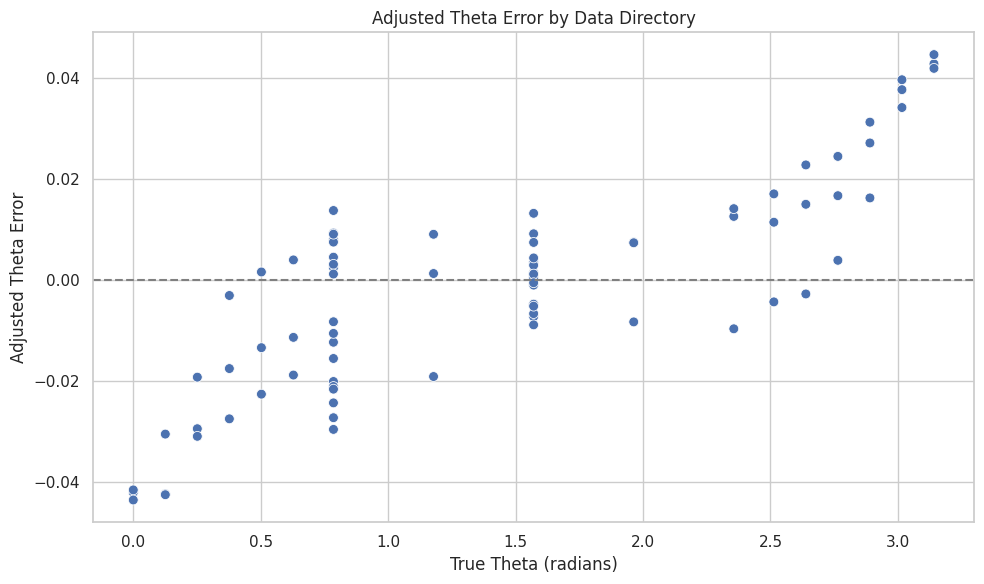

In [ ]:
fixed_n_theta_offsets["adjusted_theta_error"] = (fixed_n_theta_offsets["theta_estimate_mean"] - fixed_n_theta_offsets["best_guess_estimator_theta"])
# plot the adjusted theta error
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_theta_offsets[fixed_n_theta_offsets["N_"].isin([40])],
                x="theta_mean",
                y="adjusted_theta_error",
                hue=fixed_n_theta_offsets["N_"].astype(str),
                palette="deep", s=50)
plt.title("Adjusted Theta Error by Data Directory")
plt.xlabel("True Theta (radians)")
plt.ylabel("Adjusted Theta Error")
plt.axhline(0, color='gray', linestyle='--')
plt.legend([], [], frameon=False)
plt.tight_layout()

plt.show()

In [ ]:
adjusted_theta_offsets_for_plot = fixed_n_theta_offsets.groupby(["theta_mean", "N_"]).agg({
    "adjusted_theta_error": ["mean", "std", "var"],
    "theta_estimate_mean": ["mean", "std", "var"],
    "best_guess_estimator_theta": ["mean", "std", "var"]
}).reset_index().rename(columns={"theta_mean": "True Theta (radians)"})
adjusted_theta_offsets_for_plot["normalised_adjusted_theta_error"] = adjusted_theta_offsets_for_plot["adjusted_theta_error"]["mean"] * np.sqrt(adjusted_theta_offsets_for_plot["N_"]) 
adjusted_theta_offsets_for_plot["normalised_adjusted_theta_error_std"] = adjusted_theta_offsets_for_plot["adjusted_theta_error"]["std"] * np.sqrt(adjusted_theta_offsets_for_plot["N_"])
adjusted_theta_offsets_for_plot

True Theta (radians)     N_ adjusted_theta_error                          \
                                               mean       std           var   
0                0.0000   40.0            -0.042358  0.001036  1.072419e-06   
1                0.0000   80.0            -0.017310  0.001407  1.980216e-06   
2                0.0000  120.0            -0.010183  0.000968  9.367002e-07   
3                0.0000  160.0            -0.007650  0.001012  1.024555e-06   
4                0.0000  200.0            -0.006026  0.001057  1.116607e-06   
..                  ...    ...                  ...       ...           ...   
80               3.1416   40.0             0.043207  0.001390  1.932037e-06   
81               3.1416   80.0             0.017911  0.001663  2.764337e-06   
82               3.1416  120.0             0.010242  0.001334  1.780768e-06   
83               3.1416  160.0             0.006940  0.000769  5.907352e-07   
84               3.1416  200.0             0.005377  0.000940  8.835858e-07   

   theta_estimate_mean                         best_guess_estimator_theta  \
                  mean       std           var                       mean   
0             0.229667  0.001036  1.072419e-06                   0.272025   
1             0.254715  0.001407  1.980216e-06                   0.272025   
2             0.261842  0.000968  9.367002e-07                   0.272025   
3             0.264375  0.001012  1.024555e-06                   0.272025   
4             0.266000  0.001057  1.116607e-06                   0.272025   
..                 ...       ...           ...                        ...   
80            2.915699  0.001390  1.932037e-06                   2.872492   
81            2.890403  0.001663  2.764337e-06                   2.872492   
82            2.882734  0.001334  1.780768e-06                   2.872492   
83            2.879432  0.000769  5.907352e-07                   2.872492   
84            2.877869  0.000940  8.835858e-07                   2.872492   

             normalised_adjusted_theta_error  \
    std  var                                   
0   0.0  0.0                       -0.267897   
1   0.0  0.0                       -0.154827   
2   0.0  0.0                       -0.111554   
3   0.0  0.0                       -0.096772   
4   0.0  0.0                       -0.085214   
..  ...  ...                             ...   
80  0.0  0.0                        0.273268   
81  0.0  0.0                        0.160203   
82  0.0  0.0                        0.112193   
83  0.0  0.0                        0.087782   
84  0.0  0.0                        0.076041   

   normalised_adjusted_theta_error_std  
                                        
0                             0.006550  
1                             0.012586  
2                             0.010602  
3                             0.012803  
4                             0.014944  
..                                 ...  
80                            0.008791  
81                            0.014871  
82                            0.014618  
83                            0.009722  
84                            0.013294  

[85 rows x 13 columns]

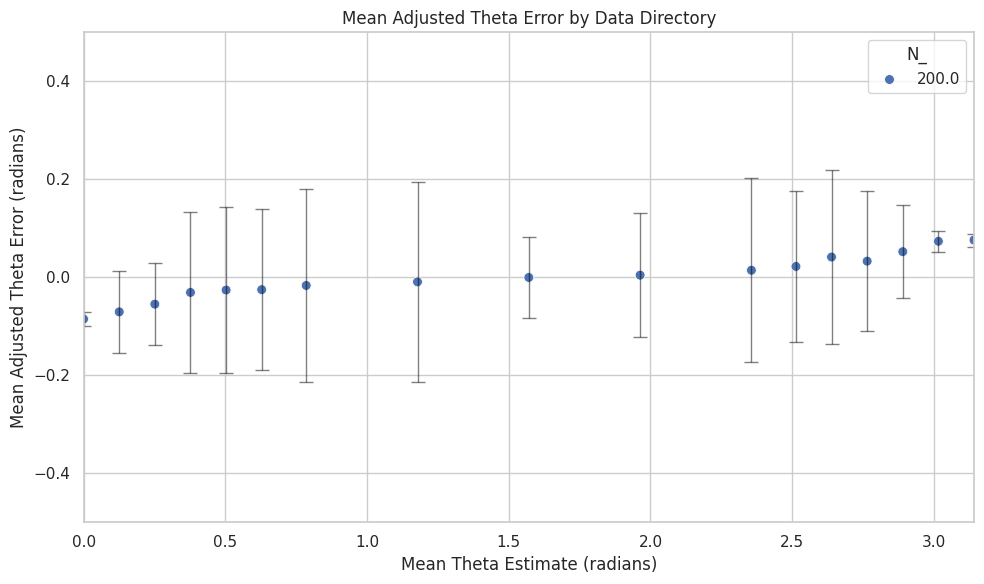

In [ ]:
subset = adjusted_theta_offsets_for_plot[adjusted_theta_offsets_for_plot["N_"].isin([200])]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=subset,
    x="True Theta (radians)",
    y="normalised_adjusted_theta_error",
    hue=subset["N_"].astype(str),
    palette="deep",
    s=50
)

plt.errorbar(
    subset["True Theta (radians)"],
    subset["normalised_adjusted_theta_error"],
    yerr=subset["normalised_adjusted_theta_error_std"],
    fmt='none',  # Do not plot lines or markers
    ecolor='black',
    capsize=5,
    elinewidth=1,
    alpha=0.5
)

plt.title("Mean Adjusted Theta Error by Data Directory")
plt.xlabel("Mean Theta Estimate (radians)")
plt.ylabel("Mean Adjusted Theta Error (radians)")
plt.xlim(0, np.pi)
plt.ylim(-0.5, 0.5)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_adjusted_theta_error_by_data_dir.png")
# plt.savefig(file_name, dpi=300)
plt.show()

# Theta

In [97]:
# round N to the nearest 40
estimates_df["nearest_40_N"] = estimates_df["N"].apply(lambda x: round(x / 40) * 40)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,nearest_40_N
0,2025-06-03--16h-33m-47s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,40
1,2025-06-03--16h-33m-47s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,40
2,2025-06-03--16h-33m-47s,2.0,38.0,0.0,0.0,40.0,NaN,0.317560,1.570796,0.000000,0.000000,40
3,2025-06-03--16h-33m-47s,2.0,38.0,0.0,0.0,40.0,NaN,0.317560,1.570796,0.000000,0.000000,40
4,2025-06-03--16h-33m-47s,3.0,37.0,0.0,0.0,40.0,NaN,0.389761,1.570796,0.000000,0.000000,40
...,...,...,...,...,...,...,...,...,...,...,...,...
3795413,2025-06-03--20h-24m-15s,97.0,55.0,45.0,3.0,200.0,NaN,1.520775,1.396713,1.570796,1.570796,200
3795414,2025-06-03--20h-24m-15s,111.0,43.0,44.0,2.0,200.0,NaN,1.575796,1.437363,1.570796,1.570796,200
3795415,2025-06-03--20h-24m-15s,81.0,71.0,43.0,5.0,200.0,NaN,1.430335,1.327275,1.570796,1.570796,200
3795416,2025-06-03--20h-24m-15s,102.0,49.0,46.0,3.0,200.0,NaN,1.555796,1.400950,1.570796,1.570796,200


In [98]:
theta_estimates = estimates_df.groupby(["N", "theta"]).agg({
    "theta_estimate": ["mean", "std", "var",],
    "theta": "count",
    "delta_phi_estimate": ["mean", "std", "var"]
}).reset_index().rename(columns={"nearest_40_N": "N (rounded to nearest 40)"})
theta_estimates.columns = ['_'.join(col).strip() for col in theta_estimates.columns.values]
theta_estimates

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,40.0,0.000000,0.231673,0.145613,0.021203,39962,1.509035,0.251413,0.063208
1,40.0,0.125664,0.256834,0.143746,0.020663,39654,1.392159,0.398743,0.158996
2,40.0,0.251327,0.328065,0.136421,0.018611,39946,1.164727,0.515477,0.265717
3,40.0,0.376991,0.425206,0.124839,0.015585,39848,1.023079,0.517155,0.267449
4,40.0,0.502655,0.530838,0.118310,0.013997,39757,0.942303,0.508176,0.258242
...,...,...,...,...,...,...,...,...,...
265,535084.5,0.376991,0.438517,NaN,NaN,1,0.927283,NaN,NaN
266,535529.0,0.502655,0.539309,NaN,NaN,1,0.862784,NaN,NaN
267,535648.0,0.785398,0.809501,NaN,NaN,1,0.394541,NaN,NaN
268,535915.0,1.005310,1.011764,NaN,NaN,1,0.315372,NaN,NaN


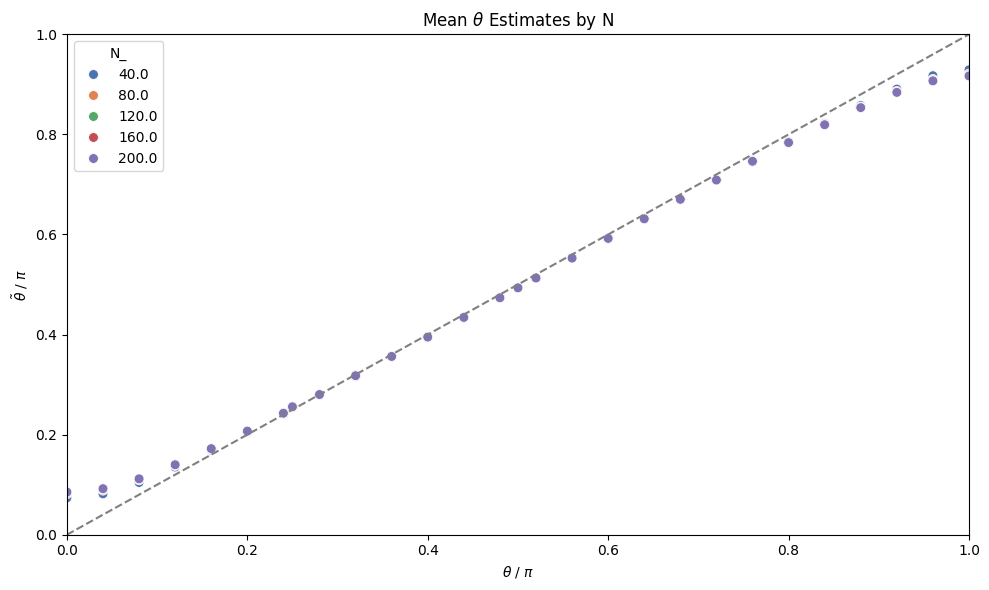

In [99]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"] < 201],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\tilde{\theta}$ / $\pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.title(r"Mean $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0, 1)
# no legend

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_theta_estimates_by_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

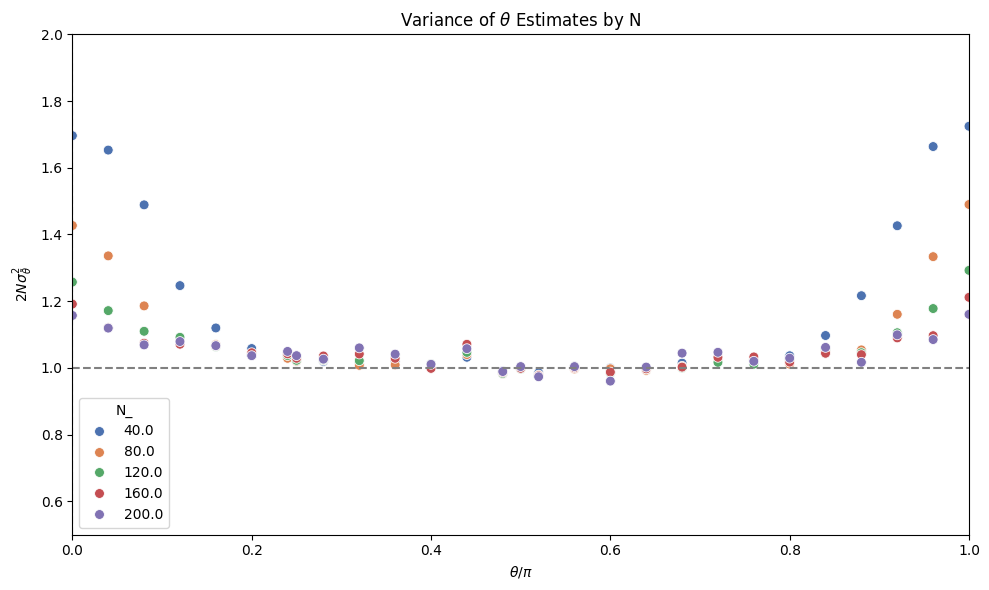

In [100]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

# Delta Phi

In [20]:
# only when theta = pi/2 or pi/4
delta_phi_estimates = estimates_df[
    estimates_df["theta"].isin([np.pi / 2, np.pi / 4])
].groupby(["N", "theta", "delta_phi"]).agg({
    "delta_phi_estimate": ["mean", "std", "var",],
    "delta_phi": "count",
}).reset_index()
delta_phi_estimates.columns = ['_'.join(col).strip() for col in delta_phi_estimates.columns.values]
delta_phi_estimates

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count
0,40.0,0.785398,0.000000,0.316620,0.207804,0.043183,13345
1,40.0,0.785398,0.062832,0.312703,0.207786,0.043175,13318
2,40.0,0.785398,0.125664,0.322633,0.208236,0.043362,13330
3,40.0,0.785398,0.188496,0.342265,0.209337,0.043822,13396
4,40.0,0.785398,0.251327,0.371944,0.206479,0.042634,13340
...,...,...,...,...,...,...,...
307,533126.5,0.785398,0.125664,0.377081,NaN,NaN,1
308,533183.0,0.785398,0.251327,0.418319,NaN,NaN,1
309,533471.0,0.785398,0.000000,0.373576,NaN,NaN,1
310,533665.0,0.785398,0.314159,0.448262,NaN,NaN,1


#### Theta = pi/2

In [21]:
delta_phi_estimates_theta_pi_over_2 = delta_phi_estimates[delta_phi_estimates["theta_"] == np.pi / 2]
delta_phi_estimates_theta_pi_over_2

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count
26,40.0,1.570796,0.000000,0.224786,0.148844,0.022155,13173
27,40.0,1.570796,0.062832,0.228165,0.149079,0.022224,13185
28,40.0,1.570796,0.125664,0.243291,0.147388,0.021723,13110
29,40.0,1.570796,0.188496,0.272814,0.145747,0.021242,13152
30,40.0,1.570796,0.251327,0.311629,0.141449,0.020008,13097
...,...,...,...,...,...,...,...
292,526085.5,1.570796,0.314159,0.378659,NaN,NaN,1
295,526462.0,1.570796,0.376991,0.423933,NaN,NaN,1
296,526897.5,1.570796,0.188496,0.306162,NaN,NaN,1
297,527198.0,1.570796,0.000000,0.267091,NaN,NaN,1


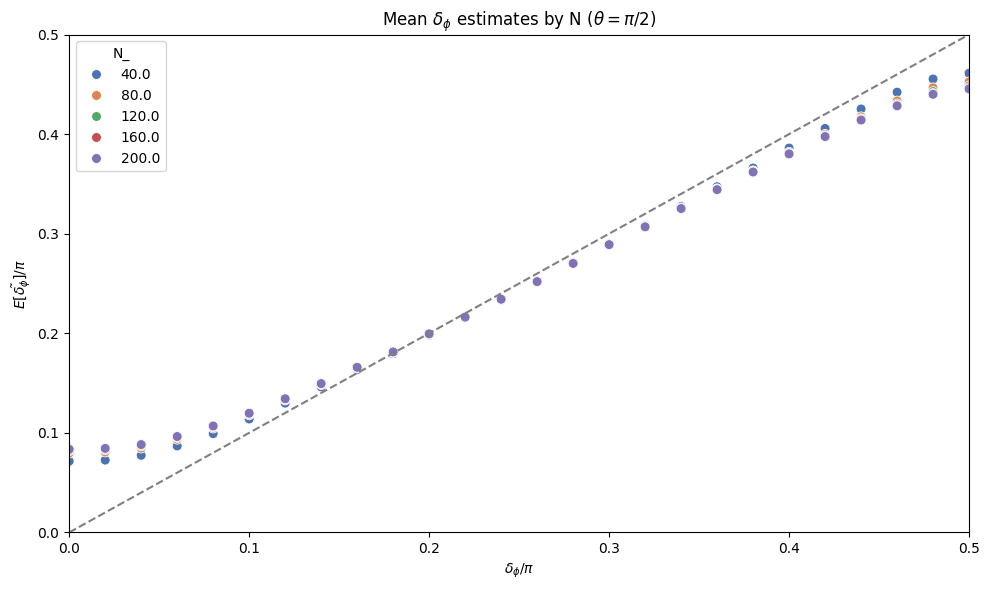

In [75]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[
        delta_phi_estimates_theta_pi_over_2["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")

plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()
plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

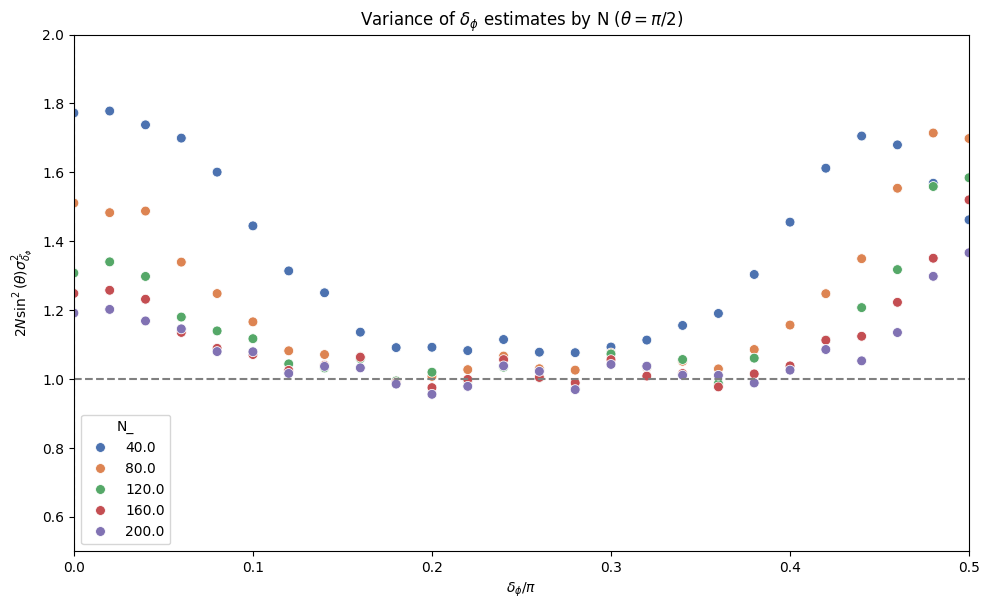

In [50]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[delta_phi_estimates_theta_pi_over_2["N_"].isin([40, 80, 120, 160, 200])],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_var"] * 2 * delta_phi_estimates_theta_pi_over_2["N_"] * np.sin(delta_phi_estimates_theta_pi_over_2["theta_"]) **2,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlim(0, 1/2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\theta) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$")

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Theta = pi/4

In [24]:
delta_phi_estimates_theta_pi_over_4 = delta_phi_estimates[delta_phi_estimates["theta_"] == np.pi / 4]
delta_phi_estimates_theta_pi_over_4

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count
0,40.0,0.785398,0.000000,0.316620,0.207804,0.043183,13345
1,40.0,0.785398,0.062832,0.312703,0.207786,0.043175,13318
2,40.0,0.785398,0.125664,0.322633,0.208236,0.043362,13330
3,40.0,0.785398,0.188496,0.342265,0.209337,0.043822,13396
4,40.0,0.785398,0.251327,0.371944,0.206479,0.042634,13340
...,...,...,...,...,...,...,...
307,533126.5,0.785398,0.125664,0.377081,NaN,NaN,1
308,533183.0,0.785398,0.251327,0.418319,NaN,NaN,1
309,533471.0,0.785398,0.000000,0.373576,NaN,NaN,1
310,533665.0,0.785398,0.314159,0.448262,NaN,NaN,1


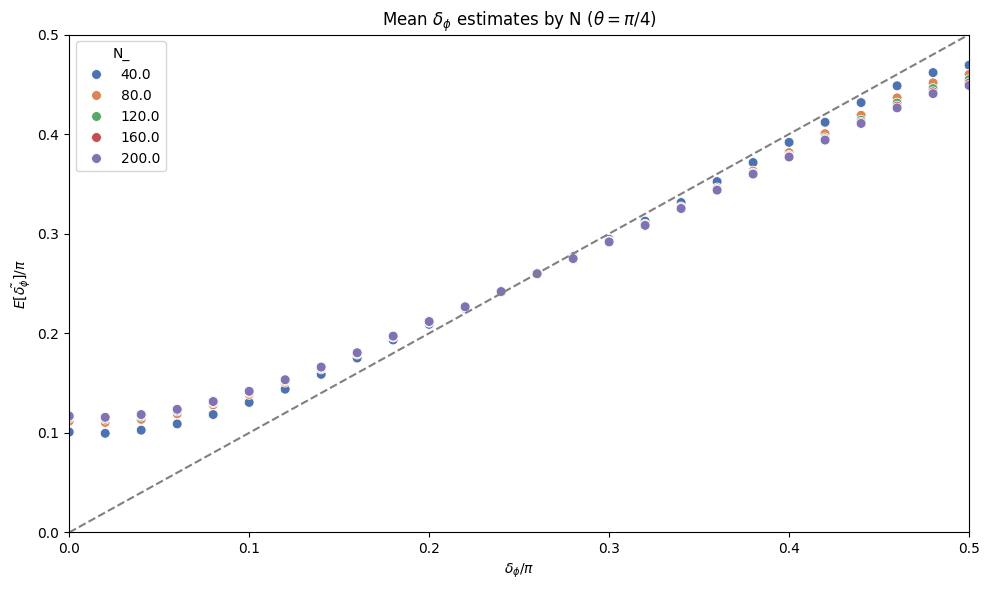

In [74]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[
        delta_phi_estimates_theta_pi_over_4["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_4["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)


plt.xlabel(r"$\delta_{\phi} / \pi$")

plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

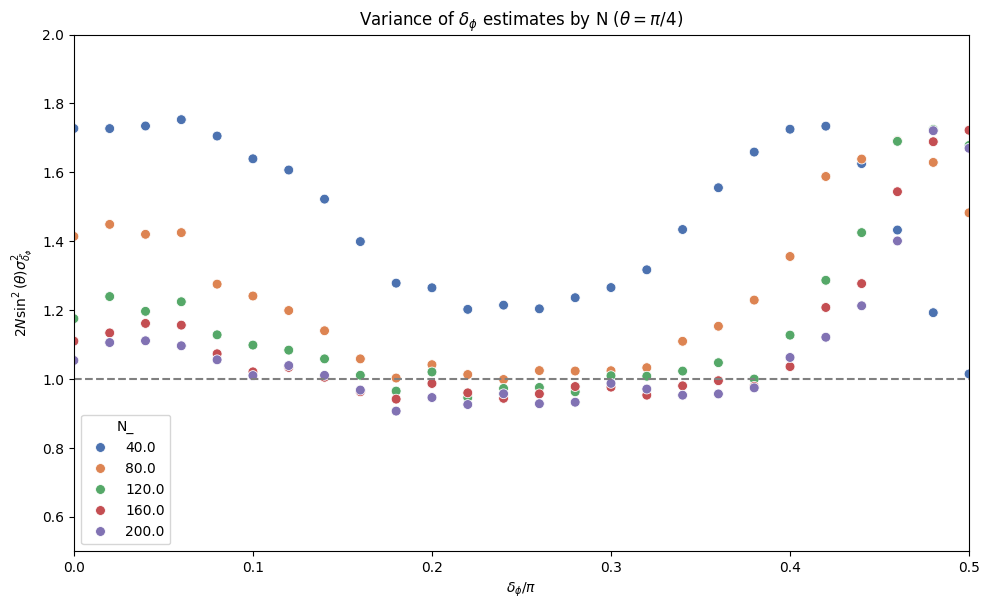

In [54]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[delta_phi_estimates_theta_pi_over_4["N_"].isin([40, 80, 120, 160, 200])],
    x=delta_phi_estimates_theta_pi_over_4["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_var"] * 2 * delta_phi_estimates_theta_pi_over_4["N_"] * np.sin(delta_phi_estimates_theta_pi_over_4["theta_"]) **2,
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlim(0, 1/2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\theta) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$")

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png"
)
plt.savefig(file_name, dpi=300)
plt.show()